In [ ]:
from google.colab import files

!pip install -q -U pandas
import pandas as pd
import io


     |████████████████████████████████| 9.5MB 7.7MB/s 


In [ ]:
try:
  df = pd.read_csv('BBox_List_2017.csv')
except:
  uploaded = files.upload()
  df= pd.read_csv(io.BytesIO(uploaded['BBox_List_2017.csv']))
df.head(n=5)

Saving Data_Entry_2017.csv to Data_Entry_2017.csv
Saving BBox_List_2017.csv to BBox_List_2017.csv


,Image Index,Finding Label,Bbox [x,y,w,h],Unnamed: 6,Unnamed: 7,Unnamed: 8
0,00013118_008.png,Atelectasis,225.084746,547.019217,86.779661,79.186441,NaN,NaN,NaN
1,00014716_007.png,Atelectasis,686.101695,131.543498,185.491525,313.491525,NaN,NaN,NaN
2,00029817_009.png,Atelectasis,221.830508,317.053115,155.118644,216.949153,NaN,NaN,NaN
3,00014687_001.png,Atelectasis,726.237288,494.951420,141.016949,55.322034,NaN,NaN,NaN
4,00017877_001.png,Atelectasis,660.067797,569.780787,200.677966,78.101695,NaN,NaN,NaN


# There are duplicates for images which means we have to do multi object detection

In [ ]:
df["Image Index"].value_counts()

00010277_000.png    4
00013659_019.png    3
00020482_032.png    3
00021703_001.png    3
00010828_039.png    3
                   ..
00007120_009.png    1
00017199_005.png    1
00008399_007.png    1
00015064_001.png    1
00012592_005.png    1
Name: Image Index, Length: 880, dtype: int64

# BoundingBox definition:


https://www.hackerearth.com/blog/developers/introduction-to-object-detection/#:~:text=In%20computer%20vision%2C%20the%20most,the%20help%20of%20bounding%20boxes.&text=A%20bounding%20box%20can%20be,box%20w.r.t%20the%20image%20width

Basically used for object detection in an image

# Data Entry

In [ ]:
try:
  df_data_entry = pd.read_csv('Data_Entry_2017.csv')
except:
  uploaded = files.upload()
  df_data_entry = pd.read_csv(io.BytesIO(uploaded['Data_Entry_2017.csv']))

df_data_entry.head(n=5)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


## number of X-Ray Images

In [ ]:
print(df_data_entry.shape)

(112120, 12)


Number of samples in dataset including duplicates is 112120

## Charts for patient follow ups

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
            50],
           dtype='int64')


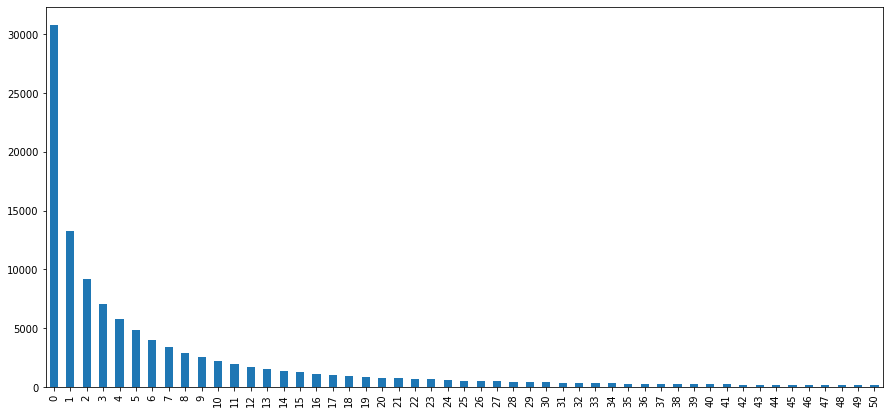

In [ ]:
output = df_data_entry[df_data_entry["Follow-up #"]<=50]["Follow-up #"].value_counts()
pd.set_option('display.max_rows', df_data_entry.shape[0])


print(output.index)
output.plot.bar(x=output.index,figsize=(15,7))

##Number of Followups 

In [ ]:
df_data_entry["Follow-up #"].value_counts()

0      30805
1      13302
2       9189
3       7089
4       5759
5       4821
6       4034
7       3426
8       2932
9       2545
10      2225
11      1944
12      1709
13      1544
14      1363
15      1242
16      1122
17      1031
18       954
19       877
20       803
21       735
22       696
23       646
24       595
25       550
26       515
27       477
28       450
29       425
30       397
31       380
32       358
33       338
34       315
35       291
36       283
37       272
38       256
39       245
40       233
41       219
42       208
43       202
44       194
45       188
46       178
47       173
48       166
49       157
50       151
51       140
52       133
53       128
54       121
55       111
56       104
57       102
58        98
59        95
60        92
61        84
62        77
63        74
64        71
65        68
66        62
67        59
68        55
69        49
70        47
71        45
72        45
73        43
74        42
75        41
76        39

In [ ]:
temp_entry = df_data_entry["Follow-up #"]
print(temp_entry)

0           0
1           1
2           2
3           0
4           0
5           1
6           2
7           3
8           4
9           5
10          6
11          7
12          0
13          0
14          1
15          2
16          3
17          4
18          5
19          6
20          7
21          0
22          0
23          0
24          1
25          2
26          0
27          0
28          0
29          1
30          2
31          3
32          4
33          5
34          6
35          7
36          8
37          0
38          0
39          1
40          2
41          3
42          4
43          5
44          6
45          7
46          8
47          9
48         10
49         11
50         12
51         13
52         14
53         15
54         16
55         17
56         18
57         19
58         20
59         21
60         22
61         23
62         24
63         25
64         26
65         27
66         28
67         29
68         30
69         31
70         32
71    

## Patient Age

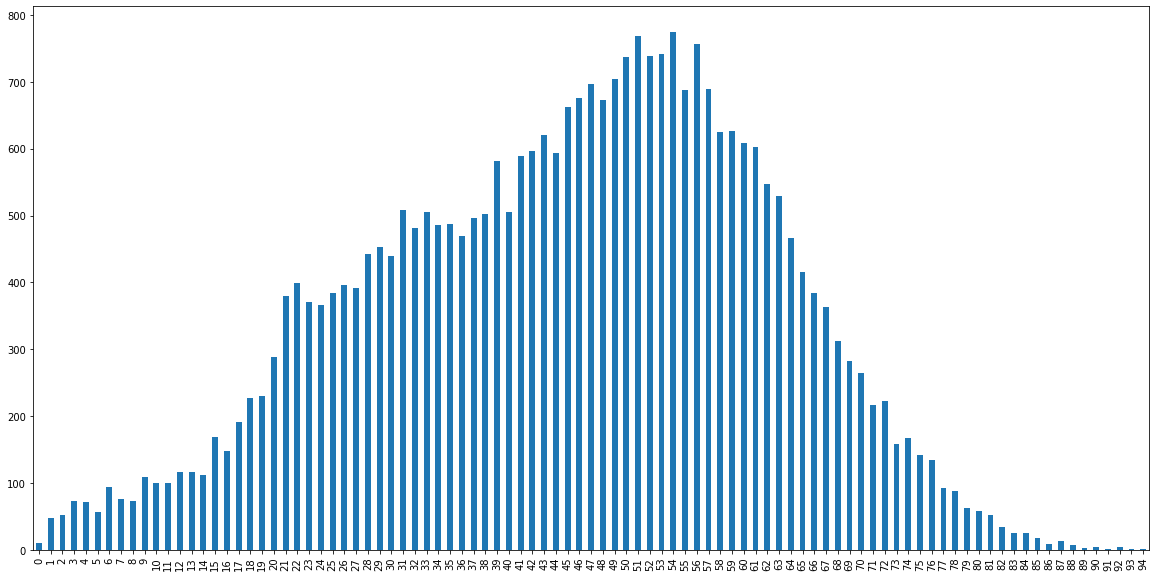

In [ ]:
import matplotlib as plt
import numpy as np
new_df = df_data_entry.loc[:,["Patient ID","Patient Age","Patient Gender"]]
new_df = new_df.set_index("Patient ID")
new_df = new_df[~new_df.index.duplicated(keep='first')].reset_index()


new_df = new_df['Patient Age'].value_counts().reset_index()
new_df.columns = ['age','people count']
new_df = new_df.sort_values(['age'], ascending=True)
new_df = new_df[new_df.age<=100]
new_df.reset_index(drop=True, inplace=True)
plot = new_df['people count'].plot.bar(figsize=(20,10))



## Number of Unique patients

In [ ]:
# number of unique patients
new_df = df_data_entry.loc[:,["Patient ID","Patient Age","Patient Gender"]]
new_df = new_df.set_index("Patient ID")
new_df = new_df[~new_df.index.duplicated(keep='first')].reset_index()
for each in new_df.columns:
  print(np.dtype(new_df[each]))

print(new_df['Patient Age'].shape)

int64
int64
object
(30805,)


Number of unique patients in dataset including duplicates is 30805

The data indicates that there are people over the age of 100 aka "155" or "412"
we need to filter them out 

## patients gender chart

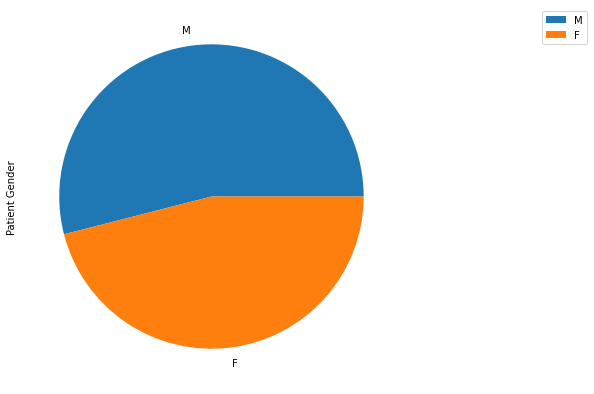

In [ ]:
plot = new_df['Patient Gender'].value_counts().plot.pie(figsize=(7,7))
plot.legend(bbox_to_anchor=(1.5,1))

56% Male - 44% Female

## Patient diseases distribution

{'Atelectasis': 11559, 'Consolidation': 4667, 'Infiltration': 19894, 'Pneumothorax': 5302, 'Edema': 2303, 'Emphysema': 2516, 'Fibrosis': 1686, 'Effusion': 13317, 'Pneumonia': 1431, 'Pleural_Thickening': 3385, 'Cardiomegaly': 2776, 'Nodule': 6331, 'Mass': 5782, 'Hernia': 227}


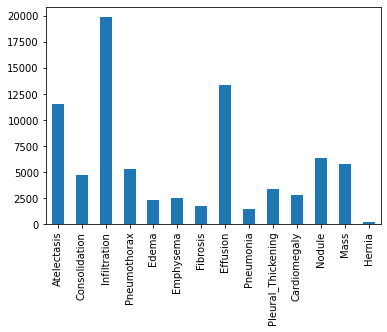

In [ ]:
df_data_entry["Finding Labels"].value_counts()
sub=["Atelectasis","Consolidation","Infiltration","Pneumothorax","Edema","Emphysema","Fibrosis","Effusion","Pneumonia","Pleural_Thickening","Cardiomegaly","Nodule","Mass","Hernia"]
diseases = {}
for disease in sub:
  diseases[disease] = df_data_entry["Finding Labels"].str.count(disease).sum()

diseases_series = pd.Series(diseases)
diseases_series.plot.bar()
print(diseases)

{'No Finding': 60361, 'Atelectasis': 11559, 'Consolidation': 4667, 'Infiltration': 19894, 'Pneumothorax': 5302, 'Edema': 2303, 'Emphysema': 2516, 'Fibrosis': 1686, 'Effusion': 13317, 'Pneumonia': 1431, 'Pleural_Thickening': 3385, 'Cardiomegaly': 2776, 'Nodule': 6331, 'Mass': 5782, 'Hernia': 227}


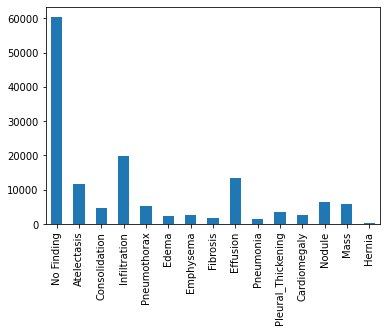

In [ ]:
df_data_entry["Finding Labels"].value_counts()
sub=["No Finding","Atelectasis","Consolidation","Infiltration","Pneumothorax","Edema","Emphysema","Fibrosis","Effusion","Pneumonia","Pleural_Thickening","Cardiomegaly","Nodule","Mass","Hernia"]
diseases = {}
for disease in sub:
  diseases[disease] = df_data_entry["Finding Labels"].str.count(disease).sum()

diseases_series = pd.Series(diseases)
diseases_series.plot.bar()
print(diseases)

## X-Ray View position Chart


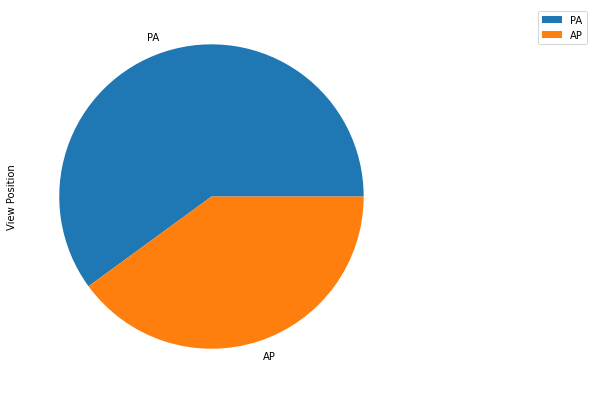

In [ ]:
new_df = df_data_entry.loc[:,["View Position"]]
plot = new_df['View Position'].value_counts().plot.pie(figsize=(7,7))
plot.legend(bbox_to_anchor=(1.5,1))


## View Position Percent

In [ ]:
new_df = df_data_entry.loc[:,["View Position"]]
plot = new_df['View Position'].value_counts()
PA = plot[0]
AP = plot[1]
PA_PERCENT = round(((PA / (AP + PA)) * 100) , 0).astype(int)
AP_PERCENT = round(((AP / (AP + PA)) * 100) , 0).astype(int)

print("PA: " + PA_PERCENT.astype(str) + "%")
print("AP: " + AP_PERCENT.astype(str) + "%")

PA: 60%
AP: 40%


There is 60% PA x-rays and 40% AP X-rays